In [2]:
import geopandas
import numpy as np
import pandas as pd
import bokeh
from bokeh.models import ColumnDataSource, HoverTool, Legend, Span, Tabs, Text, Title
from bokeh.plotting import figure, output_notebook, show
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [3]:
green_phil=geopandas.read_file("/Users/anandafigueiredo/GitHub/Green_Cover_for_Philippines_gpkg/Green_Cover_for_Philippines.gpkg")

<Axes: >

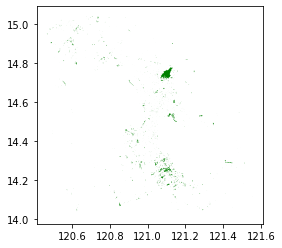

In [4]:
green_phil.plot(color="green")

<Axes: >

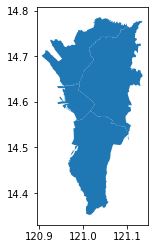

In [5]:
#Creating a GeoDataFrame that combines all four of the National Capital Region
phil_prov=geopandas.read_file('/Users/anandafigueiredo/GitHub/phl_adminboundaries_candidate_exclude_adm3/phl_admbnda_adm2_psa_namria_20200529.shp')
manila=phil_prov[phil_prov["ADM2_EN"] == "NCR, City of Manila, First District"]
ncr2=phil_prov[phil_prov["ADM2_EN"] == "NCR, Second District"]
ncr3=phil_prov[phil_prov["ADM2_EN"] == "NCR, Third District"]
ncr4=phil_prov[phil_prov["ADM2_EN"] == "NCR, Fourth District"]
ncr=geopandas.GeoDataFrame(pd.concat([manila,ncr2,ncr3,ncr4], ignore_index=True))
ncr.crs=manila.crs
ncr.plot()

In [6]:
ncr_green=geopandas.sjoin(green_phil,ncr)
ncr_green.explore(color="green")

In [7]:
sch_hos=geopandas.read_file("/Users/anandafigueiredo/GitHub/Schools__Healthcare_for_Metro_Manila_gpkg/Schools__Healthcare_for_Metro_Manila.gpkg")

In [8]:
df = pd.DataFrame({'latitude': [14.875], 'longitude': [121.125]})
geometry = geopandas.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326")
gdf = geopandas.GeoDataFrame(geometry=geometry)

In [24]:
import folium
m = sch_hos[sch_hos['amenity'].isin(["school"])].explore(color='light green') 
m = sch_hos[sch_hos['amenity'].isin(["hospital"])].explore(m=m, color='purple')
m = gdf.explore(m=m, color='red',marker_type=folium.CircleMarker(radius = 5))
ncr_green.explore(m=m,color="green")

<Axes: >

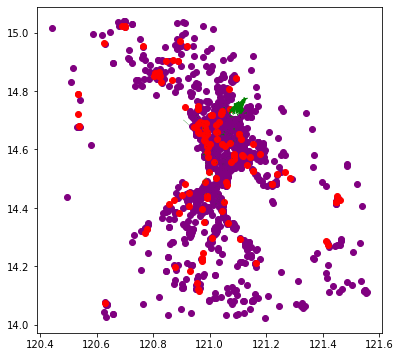

In [10]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12, 6))
sch_hos[sch_hos['amenity']=="school"].plot(ax=ax, color='purple')
sch_hos[sch_hos['amenity']=="hospital"].plot(ax=ax, color='red')
ncr_green.plot(ax=ax, color="green")